# Project: Investigate a Dataset (GDP Per Capita in Different Regions !)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_csv(csv=None):
    # getting the dataset and transposing it
    df = pd.read_csv(f'data/{csv}', index_col=0, header=None).T
    # fixing the columns naming after transposing
    df.rename(columns={'country': 'year'}, inplace=True)
    # Making sure that the year column is in int format
    df['year'] = df['year'].astype(int)
    print(f"Starting Year: {df['year'].min()} | Ending Year: {df['year'].max()}")
    return df

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

#### GDP Per Capita Dataset 

In [3]:
df_income = read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_income.head()

Starting Year: 1800 | Ending Year: 2040


,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1,1800,603,667,715,1200,618,757,1640,514,817,...,3280,1980,1810,502,585,1210,778,877,663,869
2,1801,603,667,716,1200,620,757,1640,514,822,...,3290,2020,1810,502,586,1200,778,879,665,870
3,1802,603,667,717,1200,623,757,1650,514,826,...,3300,2050,1820,502,586,1200,778,882,667,871
4,1803,603,667,718,1200,626,757,1650,514,831,...,3190,2020,1830,502,586,1190,778,884,668,872
5,1804,603,667,719,1210,628,757,1660,514,836,...,3140,2010,1840,503,586,1190,778,887,670,873


In [4]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 1 to 241
Columns: 194 entries, year to Zimbabwe
dtypes: int64(194)
memory usage: 367.1 KB


In [5]:
# the dataset ends at 2018
df_income = df_income[df_income['year'] <= 2018]
df_income.tail()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
215,2014,1800,10700,13500,44900,6810,20800,18900,7950,43700,...,38400,52100,19900,5340,2840,17100,5310,3830,3690,2510
216,2015,1770,11000,13800,46600,6650,21400,19200,8170,44100,...,39000,53200,19900,5640,2740,15600,5610,3110,3680,2510
217,2016,1760,11400,13900,48200,6260,22400,18600,8160,44600,...,39400,53600,20200,5880,2780,15200,5900,2620,3700,2490
218,2017,1760,11800,13900,49800,6050,22900,18900,8750,44900,...,39900,54500,20700,6040,2830,14500,6230,2400,3720,2570
219,2018,1740,12300,13900,51500,5730,23800,18300,9180,45400,...,40200,55700,20900,6240,2850,12500,6610,2360,3740,2620


In [6]:
# missing values
df_income.isna().sum().sum()

0

In [7]:
df_income.duplicated().sum()

0

#### OWID Education Index

In [8]:
df_owid = read_csv('owid_education_idx.csv')
df_owid.tail()

Starting Year: 1870 | Ending Year: 2017


,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
144,2013,0.233,0.647,0.520,0.68,0.327,0.613,0.653,0.760,0.840,...,0.840,0.880,0.567,0.753,0.453,0.660,0.527,0.2,0.453,0.533
145,2014,0.233,0.647,0.527,0.68,0.327,0.613,0.653,0.767,0.847,...,0.847,0.887,0.573,0.753,0.453,0.667,0.520,0.2,0.460,0.547
146,2015,0.240,0.647,0.527,0.68,0.333,0.613,0.653,0.773,0.853,...,0.853,0.887,0.580,0.760,0.453,0.673,0.533,0.2,0.460,0.547
147,2016,0.240,0.667,0.533,0.68,0.340,0.613,0.660,0.780,0.860,...,0.860,0.893,0.580,0.760,0.453,0.673,0.540,0.2,0.467,0.547
148,2017,0.253,0.667,0.533,0.68,0.340,0.613,0.660,0.780,0.860,...,0.860,0.893,0.580,0.767,0.453,0.687,0.547,0.2,0.467,0.547


In [9]:
df_owid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 1 to 148
Columns: 188 entries, year to Zimbabwe
dtypes: float64(187), int64(1)
memory usage: 218.5 KB


In [10]:
# missing values
df_owid.isna().sum()

0
year             0
Afghanistan     96
Albania         96
Algeria         96
Andorra        130
              ... 
Venezuela       96
Vietnam        112
Yemen           96
Zambia          96
Zimbabwe        96
Length: 188, dtype: int64

In [11]:
# missing values
df_owid.isna().sum().sum()

20087

In [12]:
df_owid.duplicated().sum()

0

#### Human Development Index


In [13]:
df_hid = read_csv('hdi_human_development_index.csv')
df_hid.tail()

Starting Year: 1990 | Ending Year: 2018


,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
25,2014,0.488,0.787,0.749,0.853,0.557,0.767,0.825,0.746,0.929,...,0.918,0.915,0.800,0.693,0.589,0.770,0.675,0.504,0.565,0.537
26,2015,0.490,0.788,0.751,0.850,0.565,0.770,0.828,0.748,0.933,...,0.916,0.917,0.802,0.696,0.592,0.763,0.680,0.493,0.570,0.544
27,2016,0.491,0.788,0.755,0.854,0.570,0.772,0.828,0.751,0.935,...,0.918,0.919,0.806,0.701,0.592,0.752,0.685,0.477,0.580,0.549
28,2017,0.493,0.789,0.758,0.852,0.576,0.774,0.832,0.758,0.937,...,0.919,0.919,0.807,0.707,0.595,0.735,0.690,0.463,0.589,0.553
29,2018,0.496,0.791,0.759,0.857,0.574,0.776,0.830,0.760,0.938,...,0.920,0.920,0.808,0.710,0.597,0.726,0.693,0.463,0.591,0.563


In [14]:
df_hid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 29
Columns: 189 entries, year to Zimbabwe
dtypes: float64(188), int64(1)
memory usage: 43.0 KB


In [15]:
df_hid.isna().sum()

0
year            0
Afghanistan     0
Albania         0
Algeria         0
Andorra        10
               ..
Venezuela       0
Vietnam         0
Yemen           0
Zambia          0
Zimbabwe        0
Length: 189, dtype: int64

In [16]:
df_hid.isna().sum().sum()

517

In [17]:
df_hid.duplicated().sum()

0

#### Internet Users 

In [18]:
df_iu = read_csv('internet_users.csv')
df_iu.tail()

Starting Year: 1960 | Ending Year: 2019


,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
56,2015,8.26,63.3,38.2,96.9,12.4,70.0,68.0,59.1,84.6,...,92.0,74.6,64.6,42.8,22.4,64.0,45.0,24.1,21.0,22.7
57,2016,NaN,66.4,42.9,97.9,13.0,73.0,71.0,64.3,86.5,...,94.8,85.5,66.4,46.8,24.0,60.0,53.0,24.6,25.5,23.1
58,2017,11.40,71.8,47.7,91.6,14.3,NaN,74.3,64.7,86.5,...,90.4,87.3,70.3,48.7,25.7,64.3,58.1,26.7,27.9,27.1
59,2018,NaN,NaN,49.0,NaN,NaN,NaN,NaN,68.2,NaN,...,90.7,88.5,74.4,55.2,NaN,NaN,69.8,NaN,14.3,NaN
60,2019,NaN,69.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.5,NaN,76.9,NaN,NaN,NaN,68.7,NaN,NaN,NaN


In [19]:
df_iu.isna().sum()

0
year            0
Afghanistan    43
Albania        35
Algeria        34
Andorra        38
               ..
Venezuela      33
Vietnam        35
Yemen          37
Zambia         34
Zimbabwe       35
Length: 195, dtype: int64

In [20]:
df_iu.isna().sum().sum()

6744

In [21]:
df_iu.duplicated().sum()

0

In [22]:
df_fertility = read_csv('children_per_woman_total_fertility.csv')
df_fertility.head()

Starting Year: 1800 | Ending Year: 2100


,year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1,1800,7.0,4.6,6.99,6.93,5.00,6.8,7.80,6.50,5.1,...,4.97,7.03,5.97,5.71,6.6,5.63,4.7,6.88,6.71,6.75
2,1801,7.0,4.6,6.99,6.93,5.00,6.8,7.80,6.48,5.1,...,4.60,7.01,5.97,5.71,6.6,5.63,4.7,6.88,6.71,6.75
3,1802,7.0,4.6,6.99,6.93,4.99,6.8,7.81,6.46,5.1,...,5.30,6.99,5.96,5.71,6.6,5.64,4.7,6.88,6.71,6.75
4,1803,7.0,4.6,6.99,6.93,4.99,6.8,7.81,6.44,5.1,...,5.61,6.96,5.96,5.71,6.6,5.64,4.7,6.88,6.71,6.75
5,1804,7.0,4.6,6.99,6.93,4.99,6.8,7.81,6.42,5.1,...,5.65,6.94,5.96,5.71,6.6,5.64,4.7,6.88,6.71,6.75


In [23]:
df_fertility = df_fertility[df_fertility['year'] <= 2018]
df_fertility.tail()

,year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
215,2014,4.98,1.71,2.89,5.84,2.08,2.32,1.69,1.87,1.48,...,1.88,1.95,2.02,2.34,3.35,2.37,1.96,4.22,5.10,3.90
216,2015,4.80,1.71,2.84,5.77,2.06,2.31,1.66,1.86,1.49,...,1.88,1.93,2.01,2.31,3.31,2.34,1.96,4.10,5.04,3.84
217,2016,4.64,1.71,2.78,5.69,2.05,2.29,1.63,1.85,1.49,...,1.87,1.92,2.00,2.29,3.28,2.32,1.95,4.00,4.98,3.76
218,2017,4.48,1.71,2.71,5.62,2.04,2.28,1.60,1.84,1.50,...,1.87,1.91,1.98,2.26,3.24,2.29,1.95,3.89,4.93,3.68
219,2018,4.33,1.71,2.64,5.55,2.03,2.26,1.60,1.83,1.52,...,1.87,1.90,1.97,2.23,3.20,2.27,1.95,3.79,4.87,3.61


#### Making sure that we are working with the same data across all datasets
- same number of countries
- Same years

In [24]:
dfs_columns = [df_income.columns, df_iu.columns, df_hid.columns, df_owid.columns, df_fertility.columns]

In [25]:
for c in dfs_columns:
    print(f'Number of countries = {len(c)-1}')

Number of countries = 193
Number of countries = 194
Number of countries = 188
Number of countries = 187
Number of countries = 184


##### Getting the intersection between the countries 

year is also common

In [26]:
countries = dfs_columns[0]
for c in dfs_columns[1:]:
    countries = np.intersect1d(countries, c)
    print(f'Number of countries {len(countries)}')

Number of countries 194
Number of countries 188
Number of countries 186
Number of countries 181


In [27]:
# update the rest of the datasets 
df_income = df_income[countries]
df_iu = df_iu[countries]
df_hid = df_hid[countries]
df_owid = df_owid[countries]
df_fertility = df_fertility[countries]

In [28]:
dfs_columns = [df_income.columns, df_iu.columns, df_hid.columns, df_owid.columns, df_fertility.columns]
for c in dfs_columns:
    print(f'Number of countries = {len(c)-1}')

Number of countries = 180
Number of countries = 180
Number of countries = 180
Number of countries = 180
Number of countries = 180


#### Picking the year period with the lowest number null values 

In [29]:
def null_per_year(df):
    nulls = {}
    for y in df['year']:
        n_nulls = df[df['year'] == y].isna().sum().sum()
        if n_nulls > 0:
            nulls[y] = n_nulls
    
    return pd.Series(nulls).to_frame('nulls')

In [30]:
dfs = {'Income': df_income, 'Interent Use': df_iu, 'Human Development Index': df_hid, 'Education Index': df_owid, 'Fertility': df_fertility}

In [31]:
null_dfs = []
print('-'*5, 'Dataframes with nulls!', '-'*5)
for df in dfs:
    n_nulls = dfs[df].isna().sum().sum()
    if n_nulls > 0:
        print(f"Numer of Nulls in {df}: {n_nulls}")
        null_dfs.append(df)

----- Dataframes with nulls! -----
Numer of Nulls in Interent Use: 6153
Numer of Nulls in Human Development Index: 415
Numer of Nulls in Education Index: 19162


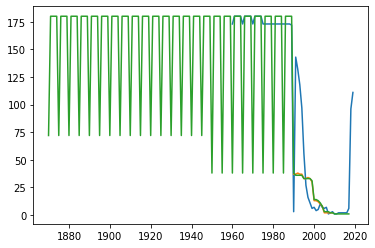

In [32]:
for df in null_dfs:
    nulls = null_per_year(dfs[df])
    plt.plot(nulls)
plt.show()

the internet was available to the public in 1991

In [33]:
plt.style.available

['bmh',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-white',
 'classic',
 'seaborn-deep',
 '_classic_test',
 'seaborn-muted',
 'seaborn-pastel',
 'seaborn-dark',
 'seaborn-ticks',
 'dark_background',
 'seaborn-whitegrid',
 'Solarize_Light2',
 'grayscale',
 'seaborn-bright',
 'seaborn-dark-palette',
 'ggplot',
 'seaborn-talk',
 'fast',
 'seaborn-darkgrid',
 'seaborn-paper',
 'fivethirtyeight',
 'seaborn',
 'tableau-colorblind10',
 'seaborn-colorblind']

In [34]:
plt.style.use('seaborn-whitegrid')

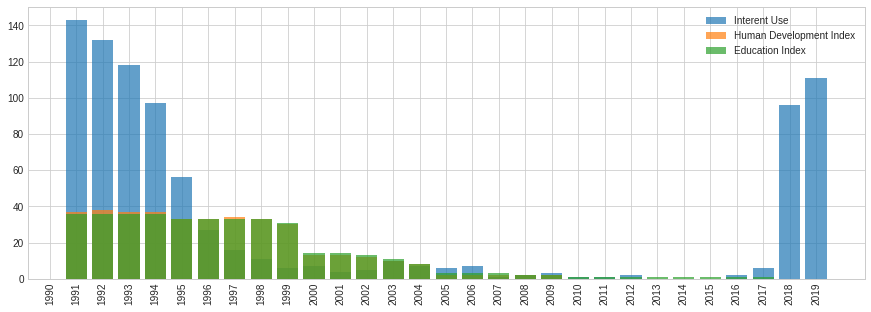

In [35]:
fig = plt.figure(figsize=(15, 5))
for df in null_dfs:
    nulls = null_per_year(dfs[df]).loc[1991:]
    plt.bar(nulls.index, nulls['nulls'], alpha=0.7)


plt.legend(null_dfs)
plt.xticks(np.arange(1990, 2020), rotation='vertical')
plt.show()

I will be using the years from 2007 to 2016

In [36]:
dfs.keys()

dict_keys(['Income', 'Interent Use', 'Human Development Index', 'Education Index', 'Fertility'])

In [37]:
df_income = df_income.query('2017 >= year >= 2000')
df_iu = df_iu.query('2017 >= year >= 2000')
df_hid = df_hid.query('2017 >= year >= 2000')
df_owid = df_owid.query('2017 >= year >= 2000')
df_fertility = df_fertility.query('2017 >= year >= 2000')

In [38]:
dfs = {'Income': df_income, 'Interent Use': df_iu, 'Human Development Index': df_hid, 'Education Index': df_owid, 'Fertility': df_fertility}

In [39]:
df_income.tail()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,year
214,1810,10500,13300,6730,20100,19600,7720,43200,44300,16600,...,51200,19400,5070,2850,18000,5070,3940,3630,2490,2013
215,1800,10700,13500,6810,20800,18900,7950,43700,44200,16900,...,52100,19900,5340,2840,17100,5310,3830,3690,2510,2014
216,1770,11000,13800,6650,21400,19200,8170,44100,44300,16800,...,53200,19900,5640,2740,15600,5610,3110,3680,2510,2015
217,1760,11400,13900,6260,22400,18600,8160,44600,44700,16100,...,53600,20200,5880,2780,15200,5900,2620,3700,2490,2016
218,1760,11800,13900,6050,22900,18900,8750,44900,45500,15900,...,54500,20700,6040,2830,14500,6230,2400,3720,2570,2017


In [40]:
for df in dfs:
    print(dfs[df].shape, 'Shape ', df)

(18, 181) Shape  Income
(18, 181) Shape  Interent Use
(18, 181) Shape  Human Development Index
(18, 181) Shape  Education Index
(18, 181) Shape  Fertility


### fill missing values

In [41]:
for df in dfs:
    print(' number of missing values in ', df, ' :', dfs[df].isna().sum().sum())

 number of missing values in  Income  : 0
 number of missing values in  Interent Use  : 64
 number of missing values in  Human Development Index  : 66
 number of missing values in  Education Index  : 81
 number of missing values in  Fertility  : 0


drop countries with more than 50% missing values

In [47]:
df_owid.isna().sum()[df_owid.isna().sum()>0]

0
Bhutan            5
Comoros           4
Eritrea           5
Grenada           2
Guinea-Bissau     5
Lebanon           5
Montenegro        3
Nigeria           3
Palestine         4
South Korea      18
South Sudan       8
Suriname          4
Turkmenistan     10
Vanuatu           5
dtype: int64

In [57]:
drop_countries = {'Turkmenistan', 'South Korea'}

In [58]:
df_iu.isna().sum()[df_iu.isna().sum()>0]

0
Afghanistan                        2
Antigua and Barbuda                1
Australia                          3
Azerbaijan                         2
Bangladesh                         1
Belarus                            3
Belize                             2
Bhutan                             1
Ecuador                            1
Eritrea                            4
Guyana                             5
Iraq                               1
Ireland                            1
Liberia                            2
Libya                              1
Madagascar                         1
Mongolia                           4
Montenegro                         4
Myanmar                            1
Pakistan                           1
Rwanda                             1
Serbia                             4
Seychelles                         1
South Sudan                       13
St. Vincent and the Grenadines     1
Sudan                              3
dtype: int64

In [59]:
drop_countries.add('South Sudan')

In [60]:
df_hid.isna().sum()[df_hid.isna().sum()>0]

0
Antigua and Barbuda     5
Bhutan                  5
Eritrea                 5
Grenada                 2
Guinea-Bissau           5
Lebanon                 5
Montenegro              3
Nigeria                 3
Palestine               4
South Sudan            10
Suriname                4
Turkmenistan           10
Vanuatu                 5
dtype: int64

In [61]:
drop_countries.add('South Sudan')
drop_countries.add('Turkmenistan')

In [62]:
# drop countries with very high missing values
df_income.drop(drop_countries, axis=1, inplace=True)
df_iu.drop(drop_countries, axis=1, inplace=True)
df_hid.drop(drop_countries, axis=1, inplace=True)
df_owid.drop(drop_countries, axis=1, inplace=True)
df_fertility.drop(drop_countries, axis=1, inplace=True)

/home/kelwa/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
dfs = {'Income': df_income, 'Interent Use': df_iu, 'Human Development Index': df_hid, 'Education Index': df_owid, 'Fertility': df_fertility}

In [64]:
for df in dfs:
    print(dfs[df].shape, 'Shape ', df)

(18, 178) Shape  Income
(18, 178) Shape  Interent Use
(18, 178) Shape  Human Development Index
(18, 178) Shape  Education Index
(18, 178) Shape  Fertility


In [65]:
for df in dfs:
    print(' number of missing values in ', df, ' :', dfs[df].isna().sum().sum())

 number of missing values in  Income  : 0
 number of missing values in  Interent Use  : 51
 number of missing values in  Human Development Index  : 46
 number of missing values in  Education Index  : 45
 number of missing values in  Fertility  : 0


In [67]:
df_iu = df_iu.interpolate(method='linear', limit_direction='both')
df_hid = df_hid.interpolate(method='linear', limit_direction='both')
df_owid = df_owid.interpolate(method='linear', limit_direction='both')

In [69]:
dfs = {'Income': df_income, 'Interent Use': df_iu, 'Human Development Index': df_hid, 'Education Index': df_owid, 'Fertility': df_fertility}

In [70]:
for df in dfs:
    print(' number of missing values in ', df, ' :', dfs[df].isna().sum().sum())

 number of missing values in  Income  : 0
 number of missing values in  Interent Use  : 0
 number of missing values in  Human Development Index  : 0
 number of missing values in  Education Index  : 0
 number of missing values in  Fertility  : 0


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!